3 - Introducing Transforms

In [1]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as T

file = '3_fullimg.hdf5'
with h5py.File(file, 'r') as rd:
    XT = np.array(rd['x_train'])
    YT = np.array(rd['y_train'])
    XTE = np.array(rd['x_test'])
    YTE = np.array(rd['y_test'])

XT = XT.astype('float32')/255
XTE = XTE.astype('float32')/255


class_enum = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
print(XT.shape)
print(YT.shape)
print(XTE.shape)
print(YTE.shape)

(232000, 3, 125, 125)
(232000,)
(1450, 3, 125, 125)
(1450,)


Images were altered alonsgide the originals to emphasize one color channel over others

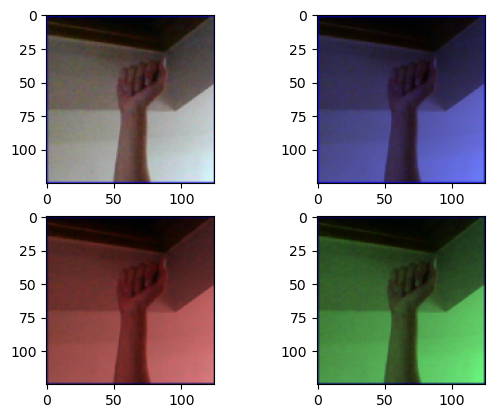

In [2]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(XT[i].T)

In [4]:
class ASLSet(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        'Initialization'
        self.labels = labels
        self.images = images
        
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.images)

    def __getitem__(self, index):
        'Generates one sample of data'
        img = self.images[index]
        lab = self.labels[index]
        X = torch.from_numpy(img)
        Y = lab
        
        return X, Y

train_set = ASLSet(XT,YT)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)

test_set = ASLSet(XTE, YTE)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 100, shuffle = False)

loss_func = nn.CrossEntropyLoss()

Unstable Model

Epoch: 01: Train Loss: 0.0337, Train Accuracy: 3.481%
            Test Loss: 0.0348, Test Accuracy: 3.448%
Epoch: 02: Train Loss: 0.0298, Train Accuracy: 14.366%
            Test Loss: 0.0304, Test Accuracy: 14.414%
Epoch: 03: Train Loss: 0.0070, Train Accuracy: 77.632%
            Test Loss: 0.0559, Test Accuracy: 20.552%
Epoch: 04: Train Loss: 0.0017, Train Accuracy: 94.825%
            Test Loss: 0.0819, Test Accuracy: 25.310%
Epoch: 05: Train Loss: 0.0007, Train Accuracy: 98.046%
            Test Loss: 0.1049, Test Accuracy: 23.862%
Epoch: 06: Train Loss: 0.0004, Train Accuracy: 98.943%
            Test Loss: 0.0857, Test Accuracy: 27.724%
Epoch: 07: Train Loss: 0.0002, Train Accuracy: 99.386%
            Test Loss: 0.1063, Test Accuracy: 25.241%
Epoch: 08: Train Loss: 0.0009, Train Accuracy: 97.803%
            Test Loss: 0.0785, Test Accuracy: 22.414%
Epoch: 09: Train Loss: 0.0005, Train Accuracy: 98.647%
            Test Loss: 0.0876, Test Accuracy: 25.724%
Epoch: 10: Train Loss

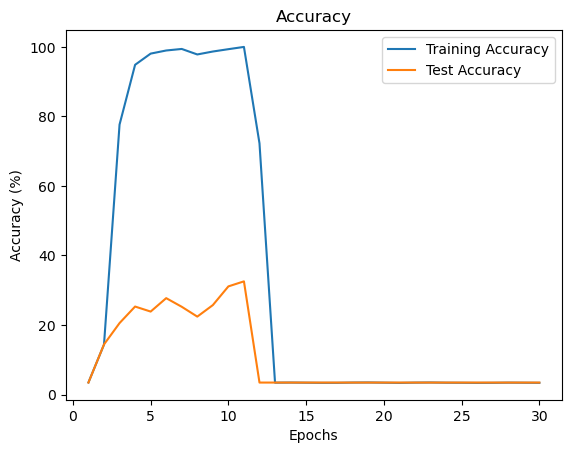

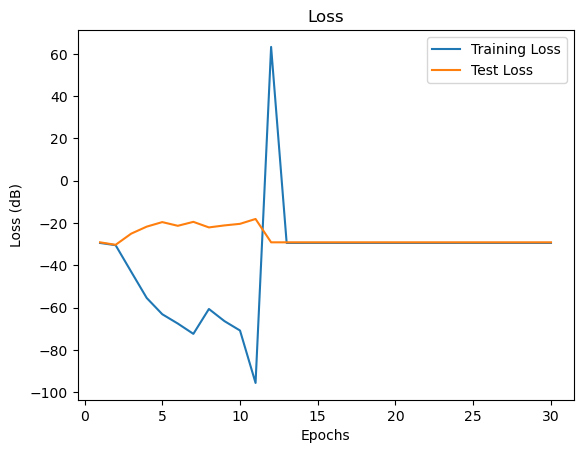

In [6]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1,self).__init__()

        self.cnn_3_16 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')
        self.cnn_16_24= nn.Conv2d(in_channels = 16, out_channels = 24, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')
        self.cnn_24_32 = nn.Conv2d(in_channels = 24, out_channels = 32, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')
        self.cnn_32_64 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')

        self.drp = nn.Dropout(0.2)
        self.pool = nn.MaxPool2d(2,2)
        self.batch_8 = nn.BatchNorm2d(8)
        self.batch_16 = nn.BatchNorm2d(16)
        self.batch_24 = nn.BatchNorm2d(24)

        self.fc1 = nn.Linear(1600, 200) # Will need to change based on CNN Option
        self.fc2 = nn.Linear(200, 100)
        self.output = nn.Linear(100, 29)
        
    def forward(self, x):
        
        ## CNN Option 1
        x = self.pool(F.relu(self.cnn_3_16(x)))
        x = self.pool(F.relu(self.cnn_16_24(x)))
        x = self.pool(F.relu(self.cnn_24_32(x)))
        x = self.pool(F.relu(self.cnn_32_64(x)))

        ## CNN Option 2
        # x = F.relu(self.cnn_3_8(x))
        # x = self.batch_8(self.pool(x))
        # x = F.relu(self.cnn_8_16(x))
        # x = self.batch_16(self.pool(x))
        # x = F.relu(self.cnn_16_24(x))
        # x = self.batch_24(self.pool(x))
        # x = F.relu(self.cnn_24_24(x))
        # x = self.batch_24(self.pool(x))

        ## CNN Option 3
        # x = F.relu(self.cnn_3_8(x))
        # x = self.batch_8(self.pool(x))
        # x = F.relu(self.cnn_8_16(x))
        # x = self.batch_16(self.pool(x))
        # x = self.drp(x)
        # x = F.relu(self.cnn_16_24(x))
        # x = self.batch_24(self.pool(x))
        # x = F.relu(self.cnn_24_24(x))
        # x = self.batch_24(self.pool(x))
        

        ## Dense Option 1
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        ## Dense Option 2
        # x = torch.flatten(x,1)
        # x = self.drp(x)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))

        return self.output(x)

model1 = Net1()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.05)

train_loss_arr = []
train_acc_arr = []
test_loss_arr = []
test_acc_arr = []
num_epochs = 30
for epoch in range(num_epochs):
    train_correct = 0
    test_correct = 0
    train_loss = 0
    test_loss = 0
    
    for images, labels in train_loader:
        model1.train()
        #Forward Prop
        outputs = model1(images)
        predictions = torch.max(outputs,1)[1]
        loss = loss_func(outputs,labels)
        train_correct += (predictions == labels).sum().numpy()
        train_loss += loss.data
        
        #Back Prop
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

    for images, labels in test_loader:
        model1.eval()
        #Forward Prop
        outputs = model1(images)
        loss = loss_func(outputs, labels)
        predictions = torch.max(outputs, 1)[1]
        test_correct += (predictions == labels).sum().numpy()
        test_loss += loss.data

    train_loss_arr.append(train_loss/len(train_loader.dataset))
    train_acc_arr.append(train_correct/len(train_loader.dataset))
    test_loss_arr.append(test_loss/len(test_loader.dataset))
    test_acc_arr.append(test_correct/len(test_loader.dataset))

    print(f'Epoch: {epoch+1:02d}: Train Loss: {(train_loss/len(train_loader.dataset)):.4f}, Train Accuracy: {(100*train_correct/len(train_loader.dataset)):2.3f}%')
    print("           ", f'Test Loss: {(test_loss/len(test_loader.dataset)):.4f}, Test Accuracy: {(100*test_correct/len(test_loader.dataset)):2.3f}%')
print(f'Final Train Accuracy: {100*train_acc_arr[-1]:2.3f}, Final Test Accuracy: {100*test_acc_arr[-1]:2.3f}')

a = plt.figure(1)
plt.plot(range(1,num_epochs+1), 100*np.array(train_acc_arr), label = "Training Accuracy")
plt.plot(range(1,num_epochs+1), 100*np.array(test_acc_arr), label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy")
plt.legend()
plt.show()

b = plt.figure(2)
plt.plot(range(1,num_epochs+1), 20*np.log10(np.array(train_loss_arr)), label = "Training Loss")
plt.plot(range(1,num_epochs+1), 20*np.log10(np.array(test_loss_arr)), label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (dB)")
plt.title("Loss")
plt.legend()
plt.show()

Same model with Batch Normalization and Dropout added

Epoch: 01: Train Loss: 0.0072, Train Accuracy: 77.934%
            Test Loss: 0.0278, Test Accuracy: 47.103%
Epoch: 02: Train Loss: 0.0005, Train Accuracy: 98.503%
            Test Loss: 0.0254, Test Accuracy: 49.793%
Epoch: 03: Train Loss: 0.0002, Train Accuracy: 99.446%
            Test Loss: 0.0280, Test Accuracy: 58.345%
Epoch: 04: Train Loss: 0.0001, Train Accuracy: 99.674%
            Test Loss: 0.0287, Test Accuracy: 58.552%
Epoch: 05: Train Loss: 0.0001, Train Accuracy: 99.740%
            Test Loss: 0.0326, Test Accuracy: 54.000%
Epoch: 06: Train Loss: 0.0001, Train Accuracy: 99.786%
            Test Loss: 0.0292, Test Accuracy: 59.724%
Epoch: 07: Train Loss: 0.0001, Train Accuracy: 99.848%
            Test Loss: 0.0269, Test Accuracy: 60.690%
Epoch: 08: Train Loss: 0.0000, Train Accuracy: 99.882%
            Test Loss: 0.0284, Test Accuracy: 58.138%
Epoch: 09: Train Loss: 0.0000, Train Accuracy: 99.908%
            Test Loss: 0.0289, Test Accuracy: 60.828%
Epoch: 10: Train Lo

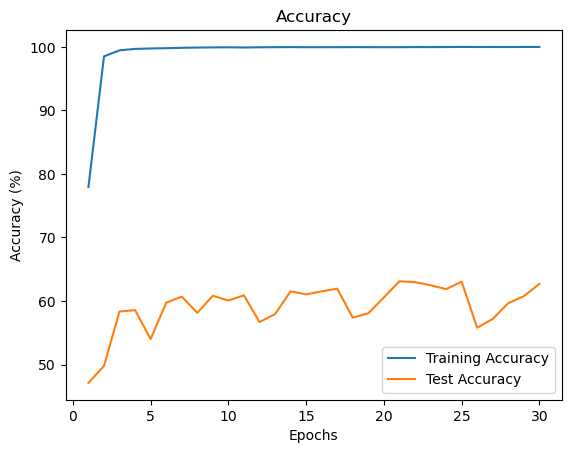

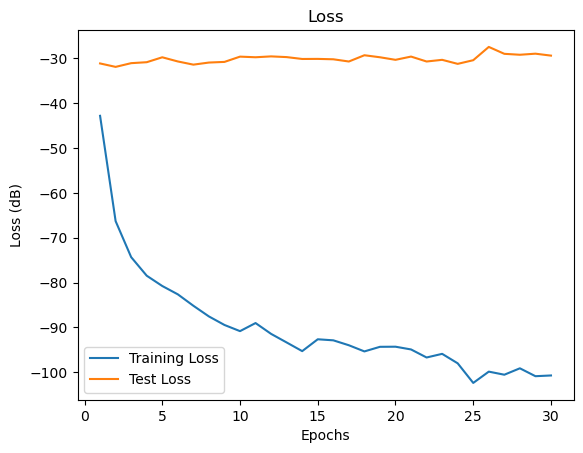

In [7]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1,self).__init__()

        self.cnn_3_16 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')
        self.cnn_16_24= nn.Conv2d(in_channels = 16, out_channels = 24, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')
        self.cnn_24_32 = nn.Conv2d(in_channels = 24, out_channels = 32, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')
        self.cnn_32_64 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 0, padding_mode = 'zeros')

        self.drp = nn.Dropout(0.2)
        self.pool = nn.MaxPool2d(2,2)
        self.batch_16 = nn.BatchNorm2d(16)
        self.batch_24 = nn.BatchNorm2d(24)
        self.batch_32 = nn.BatchNorm2d(32)
        self.batch_64 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(1600, 200) # Will need to change based on CNN Option
        self.fc2 = nn.Linear(200, 100)
        self.output = nn.Linear(100, 29)
        
    def forward(self, x):
        
        ## CNN Option 1
        # x = self.pool(F.relu(self.cnn_3_16(x)))
        # x = self.pool(F.relu(self.cnn_16_24(x)))
        # x = self.pool(F.relu(self.cnn_24_32(x)))
        # x = self.pool(F.relu(self.cnn_32_64(x)))

        ## CNN Option 2
        # x = F.relu(self.cnn_3_8(x))
        # x = self.batch_8(self.pool(x))
        # x = F.relu(self.cnn_8_16(x))
        # x = self.batch_16(self.pool(x))
        # x = F.relu(self.cnn_16_24(x))
        # x = self.batch_24(self.pool(x))

        ## CNN Option 3
        x = F.relu(self.cnn_3_16(x))
        x = self.batch_16(self.pool(x))
        x = F.relu(self.cnn_16_24(x))
        x = self.batch_24(self.pool(x))
        x = self.drp(x)
        x = F.relu(self.cnn_24_32(x))
        x = self.batch_32(self.pool(x))
        x = F.relu(self.cnn_32_64(x))
        x = self.batch_64(self.pool(x))

        ## Dense Option 1
        # x = torch.flatten(x,1)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))

        ## Dense Option 2
        x = torch.flatten(x,1)
        x = self.drp(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        return self.output(x)

model1 = Net1()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.05)

train_loss_arr = []
train_acc_arr = []
test_loss_arr = []
test_acc_arr = []
num_epochs = 30
for epoch in range(num_epochs):
    train_correct = 0
    test_correct = 0
    train_loss = 0
    test_loss = 0
    
    for images, labels in train_loader:
        model1.train()
        #Forward Prop
        outputs = model1(images)
        predictions = torch.max(outputs,1)[1]
        loss = loss_func(outputs,labels)
        train_correct += (predictions == labels).sum().numpy()
        train_loss += loss.data
        
        #Back Prop
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

    for images, labels in test_loader:
        model1.eval()
        #Forward Prop
        outputs = model1(images)
        loss = loss_func(outputs, labels)
        predictions = torch.max(outputs, 1)[1]
        test_correct += (predictions == labels).sum().numpy()
        test_loss += loss.data

    train_loss_arr.append(train_loss/len(train_loader.dataset))
    train_acc_arr.append(train_correct/len(train_loader.dataset))
    test_loss_arr.append(test_loss/len(test_loader.dataset))
    test_acc_arr.append(test_correct/len(test_loader.dataset))

    print(f'Epoch: {epoch+1:02d}: Train Loss: {(train_loss/len(train_loader.dataset)):.4f}, Train Accuracy: {(100*train_correct/len(train_loader.dataset)):2.3f}%')
    print("           ", f'Test Loss: {(test_loss/len(test_loader.dataset)):.4f}, Test Accuracy: {(100*test_correct/len(test_loader.dataset)):2.3f}%')
print(f'Final Train Accuracy: {100*train_acc_arr[-1]:2.3f}, Final Test Accuracy: {100*test_acc_arr[-1]:2.3f}')

a = plt.figure(1)
plt.plot(range(1,num_epochs+1), 100*np.array(train_acc_arr), label = "Training Accuracy")
plt.plot(range(1,num_epochs+1), 100*np.array(test_acc_arr), label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy")
plt.legend()
plt.show()

b = plt.figure(2)
plt.plot(range(1,num_epochs+1), 20*np.log10(np.array(train_loss_arr)), label = "Training Loss")
plt.plot(range(1,num_epochs+1), 20*np.log10(np.array(test_loss_arr)), label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (dB)")
plt.title("Loss")
plt.legend()
plt.show()